In [0]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
house_prices_df = pd.read_sql_query('select * from houseprices',con=engine)


engine.dispose()

In [0]:
house_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1201 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   alley          91 non-null     object 
 7   lotshape       1460 non-null   object 
 8   landcontour    1460 non-null   object 
 9   utilities      1460 non-null   object 
 10  lotconfig      1460 non-null   object 
 11  landslope      1460 non-null   object 
 12  neighborhood   1460 non-null   object 
 13  condition1     1460 non-null   object 
 14  condition2     1460 non-null   object 
 15  bldgtype       1460 non-null   object 
 16  housestyle     1460 non-null   object 
 17  overallqual    1460 non-null   int64  
 18  overallc

In [0]:
house_prices_df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,...,centralair,electrical,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000


In [0]:
house_prices_df.describe()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [0]:
null_values = house_prices_df.isnull().sum().sort_values(ascending=False)
null_values.head(30)

poolqc          1453
miscfeature     1406
alley           1369
fence           1179
fireplacequ      690
lotfrontage      259
garagecond        81
garagetype        81
garageyrblt       81
garagefinish      81
garagequal        81
bsmtexposure      38
bsmtfintype2      38
bsmtfintype1      37
bsmtcond          37
bsmtqual          37
masvnrarea         8
masvnrtype         8
electrical         1
utilities          0
yearremodadd       0
mssubclass         0
foundation         0
extercond          0
exterqual          0
exterior2nd        0
exterior1st        0
roofmatl           0
roofstyle          0
yearbuilt          0
dtype: int64

Here, I will begin the data cleaning process for those rows which have null values.

In [0]:
house_prices_df.poolqc.unique()

array([None, 'Ex', 'Fa', 'Gd'], dtype=object)

In [0]:
house_prices_df.miscfeature.unique()

array([None, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [0]:
house_prices_df.alley.unique()

array([None, 'Grvl', 'Pave'], dtype=object)

In [0]:
house_prices_df.fence.unique()

array([None, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [0]:
house_prices_df.fireplacequ.unique()

array([None, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [0]:
house_prices_df.lotfrontage.unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

In [0]:
house_prices_df.garagecond.unique()

array(['TA', 'Fa', None, 'Gd', 'Po', 'Ex'], dtype=object)

In [0]:
house_prices_df.garagetype.unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', None, 'Basment',
       '2Types'], dtype=object)

In [0]:
house_prices_df.garageyrblt.unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [0]:
house_prices_df.garagequal.unique()

array(['TA', 'Fa', 'Gd', None, 'Ex', 'Po'], dtype=object)

In [0]:
house_prices_df.bsmtexposure.unique()

array(['No', 'Gd', 'Mn', 'Av', None], dtype=object)

In [0]:
house_prices_df.bsmtfintype1.unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', None, 'LwQ'], dtype=object)

In [0]:
house_prices_df.bsmtcond.unique()

array(['TA', 'Gd', None, 'Fa', 'Po'], dtype=object)

In [0]:
house_prices_df.bsmtqual.unique()

array(['Gd', 'TA', 'Ex', None, 'Fa'], dtype=object)

In [0]:
house_prices_df.masvnrarea.unique()

array([1.960e+02, 0.000e+00, 1.620e+02, 3.500e+02, 1.860e+02, 2.400e+02,
       2.860e+02, 3.060e+02, 2.120e+02, 1.800e+02, 3.800e+02, 2.810e+02,
       6.400e+02, 2.000e+02, 2.460e+02, 1.320e+02, 6.500e+02, 1.010e+02,
       4.120e+02, 2.720e+02, 4.560e+02, 1.031e+03, 1.780e+02, 5.730e+02,
       3.440e+02, 2.870e+02, 1.670e+02, 1.115e+03, 4.000e+01, 1.040e+02,
       5.760e+02, 4.430e+02, 4.680e+02, 6.600e+01, 2.200e+01, 2.840e+02,
       7.600e+01, 2.030e+02, 6.800e+01, 1.830e+02, 4.800e+01, 2.800e+01,
       3.360e+02, 6.000e+02, 7.680e+02, 4.800e+02, 2.200e+02, 1.840e+02,
       1.129e+03, 1.160e+02, 1.350e+02, 2.660e+02, 8.500e+01, 3.090e+02,
       1.360e+02, 2.880e+02, 7.000e+01, 3.200e+02, 5.000e+01, 1.200e+02,
       4.360e+02, 2.520e+02, 8.400e+01, 6.640e+02, 2.260e+02, 3.000e+02,
       6.530e+02, 1.120e+02, 4.910e+02, 2.680e+02, 7.480e+02, 9.800e+01,
       2.750e+02, 1.380e+02, 2.050e+02, 2.620e+02, 1.280e+02, 2.600e+02,
       1.530e+02, 6.400e+01, 3.120e+02, 1.600e+01, 

In [0]:
house_prices_df.masvnrtype.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', None], dtype=object)

In [0]:
house_prices_df.electrical.unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', None], dtype=object)

In [0]:
house_prices_df.garagefinish.unique()

array(['RFn', 'Unf', 'Fin', None], dtype=object)

For most of the columns above, there are null values present because the house being sold lacks the said feature (ie. having a garage, having a pool, basement, not having electricity installed yet, etc). These null values will be replaced with a 'N/A' for 'not applicable.'

In [0]:
house_prices_df2 = house_prices_df.copy()
fill_list = ['poolqc', 'miscfeature', 'alley', 'fence', 'fireplacequ', 'garagecond', 'garagetype', 'garagequal', 'bsmtexposure', 'bsmtfintype2', 'bsmtfintype1', 'bsmtcond', 'bsmtqual', 'masvnrtype','garagefinish', 'electrical']

In [0]:
for col in fill_list:
  house_prices_df2.loc[:, col] = house_prices_df2.loc[:, col].fillna('N/A')

In [0]:
new_nulls = house_prices_df2.isnull().sum()/ house_prices_df2.isnull().count()
new_nulls.sort_values(ascending=False)

lotfrontage     0.177397
garageyrblt     0.055479
masvnrarea      0.005479
saleprice       0.000000
extercond       0.000000
                  ...   
totrmsabvgrd    0.000000
functional      0.000000
fireplaces      0.000000
fireplacequ     0.000000
id              0.000000
Length: 81, dtype: float64

For the missing columns containing numeric values, these will be filled with the mean of said column so we can perform analyses on these columns. 


In [0]:
house_prices_df2['lotfrontage'] = house_prices_df2['lotfrontage'].fillna(house_prices_df2['lotfrontage'].mean())
house_prices_df2['garageyrblt'] = house_prices_df2['garageyrblt'].fillna(house_prices_df2['garageyrblt'].mean())
house_prices_df2['masvnrarea'] = house_prices_df2['masvnrarea'].fillna(house_prices_df2['masvnrarea'].mean())

Regarding outliers, I will not be removing them or transforming them as I feel it tells us something about the data. Because this is concrete data regarding homes, it is unlikely that there is a strange observation due to some sort of an anomaly unless something drastic happened during the period the observations were taken (ie. a housing market collapse affecting the prices post-collapse.)

### Moving on to data exploration...

I will be creating histograms for those columns with numeric values.

In [0]:
numeric_columns = ['mssubclass', 'lotfrontage', 'lotarea', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd', 'masvnrarea']

In [0]:
house_prices_df3 = house_prices_df2.copy()
house_prices_number = house_prices_df3.select_dtypes(np.number)
#Here, I am isolating the columns with numeric data so histograms can be made for said data. I will be dropping the 'id' feature from this dataframe, however,
#since it is categorical

In [0]:
house_prices_number = house_prices_number.drop(['id'], axis=1)
house_prices_number

,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


In [0]:
df = house_prices_number.columns
print(df)

Index(['mssubclass', 'lotfrontage', 'lotarea', 'overallqual', 'overallcond',
       'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1', 'bsmtfinsf2',
       'bsmtunfsf', 'totalbsmtsf', 'firstflrsf', 'secondflrsf', 'lowqualfinsf',
       'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath',
       'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd', 'fireplaces',
       'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf', 'openporchsf',
       'enclosedporch', 'threessnporch', 'screenporch', 'poolarea', 'miscval',
       'mosold', 'yrsold', 'saleprice'],
      dtype='object')


In [0]:
column_list = df.to_list()
column_list

['mssubclass',
 'lotfrontage',
 'lotarea',
 'overallqual',
 'overallcond',
 'yearbuilt',
 'yearremodadd',
 'masvnrarea',
 'bsmtfinsf1',
 'bsmtfinsf2',
 'bsmtunfsf',
 'totalbsmtsf',
 'firstflrsf',
 'secondflrsf',
 'lowqualfinsf',
 'grlivarea',
 'bsmtfullbath',
 'bsmthalfbath',
 'fullbath',
 'halfbath',
 'bedroomabvgr',
 'kitchenabvgr',
 'totrmsabvgrd',
 'fireplaces',
 'garageyrblt',
 'garagecars',
 'garagearea',
 'wooddecksf',
 'openporchsf',
 'enclosedporch',
 'threessnporch',
 'screenporch',
 'poolarea',
 'miscval',
 'mosold',
 'yrsold',
 'saleprice']

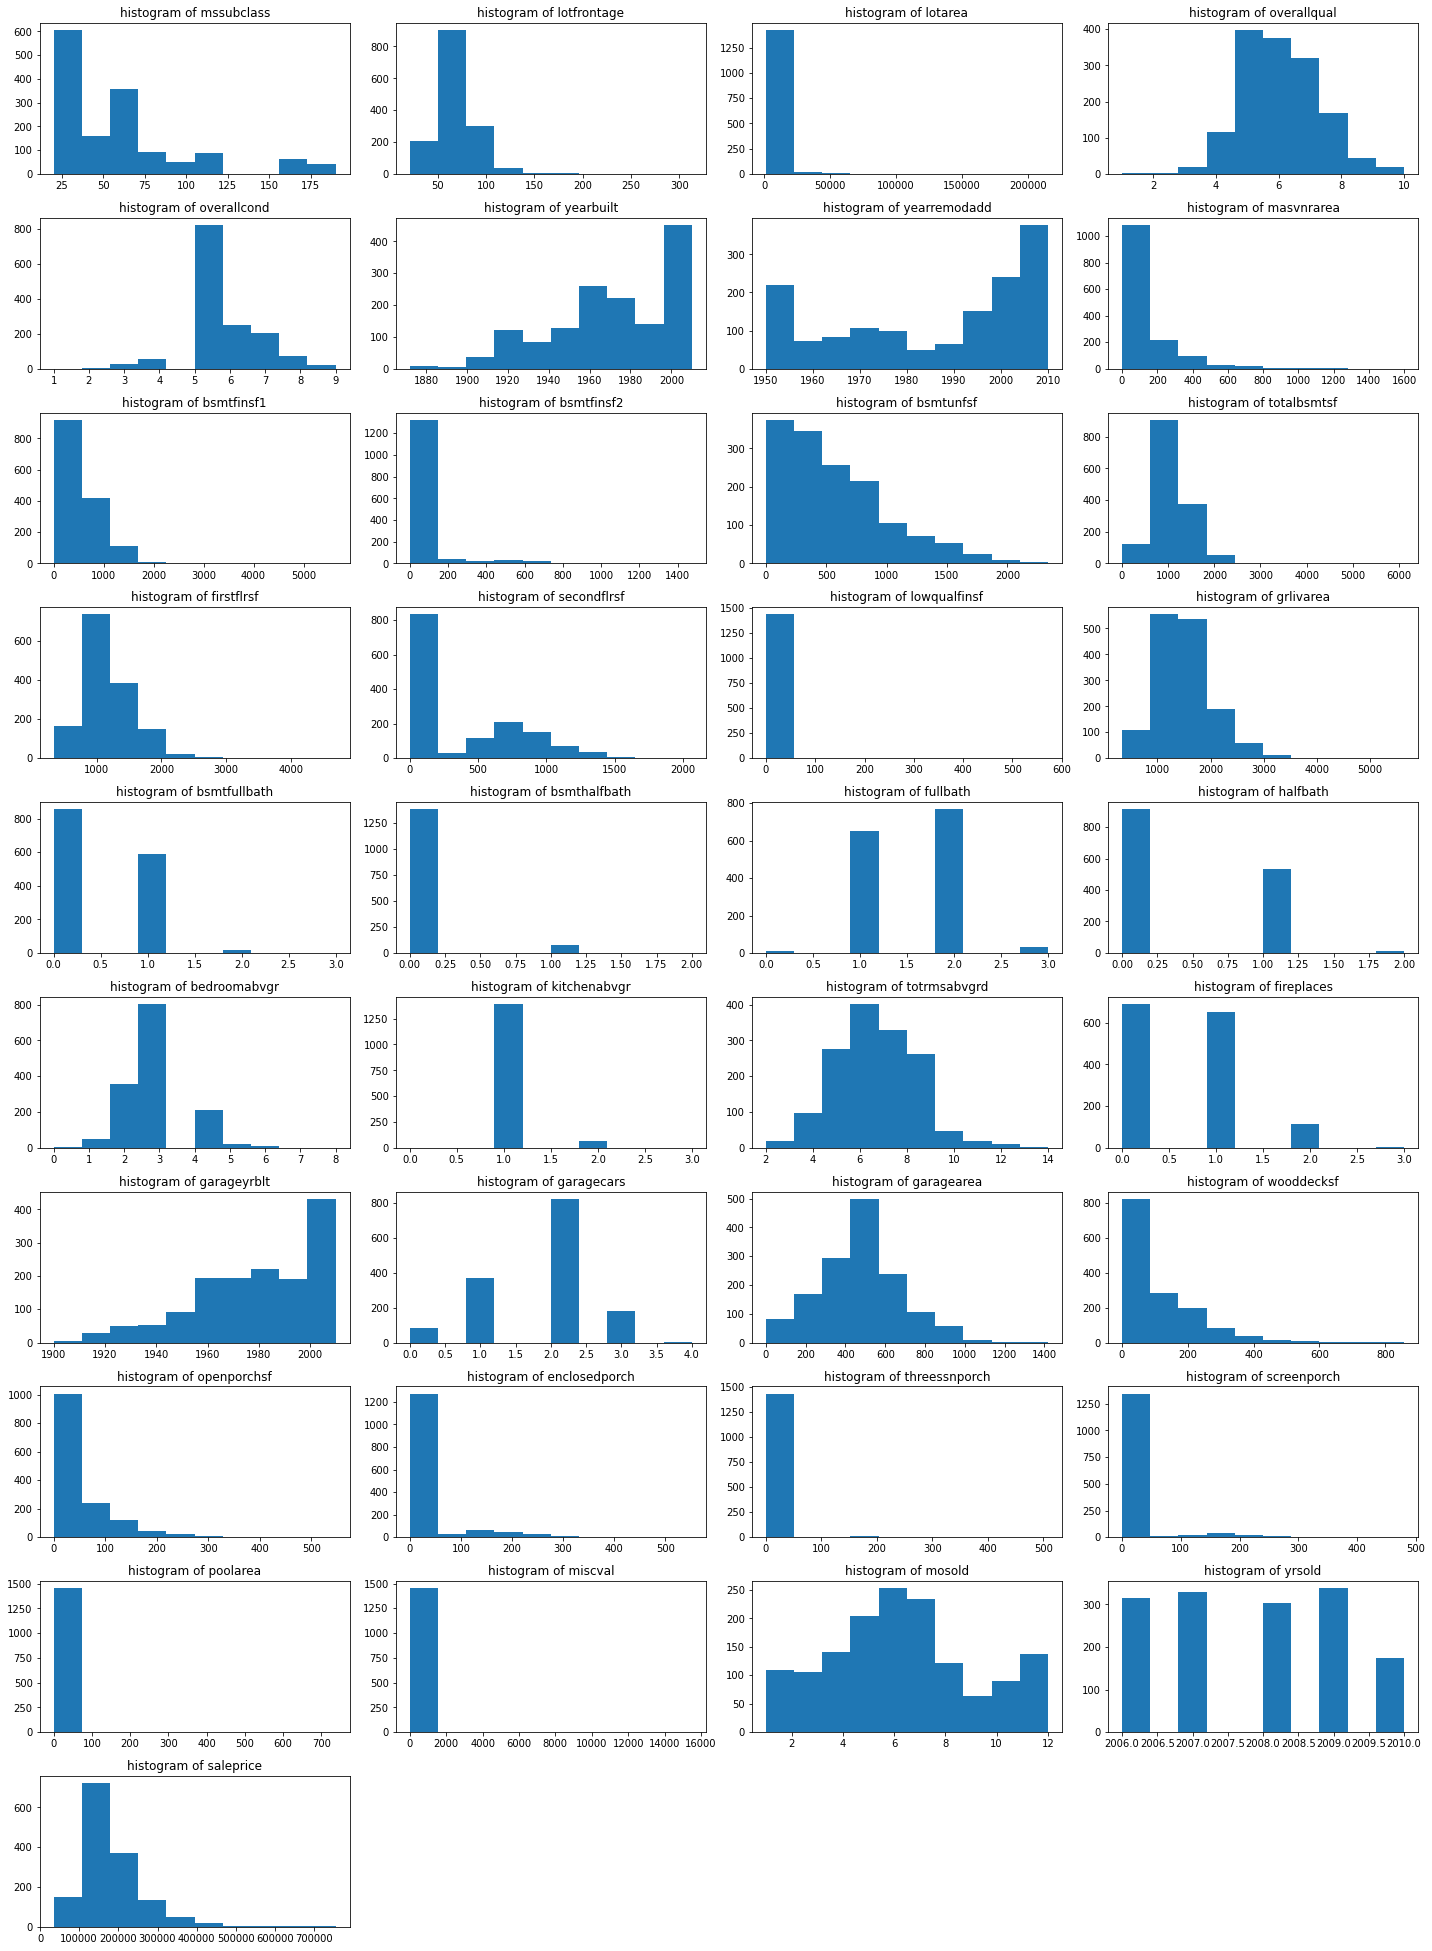

In [0]:
fig = plt.figure(figsize=(20,100))

for i, col in enumerate(column_list):
  plt.subplot(len(column_list), 4, i+1)
  plt.hist(house_prices_number[col])
  plt.title('histogram of {}'.format(col))

plt.tight_layout()
plt.show()

In [0]:
house_prices_object = house_prices_df3.select_dtypes(np.object)
house_prices_object

,mszoning,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfintype2,heating,heatingqc,centralair,electrical,kitchenqual,functional,fireplacequ,garagetype,garagefinish,garagequal,garagecond,paveddrive,poolqc,fence,miscfeature,saletype,salecondition
0,RL,Pave,N/A,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,N/A,Attchd,RFn,TA,TA,Y,N/A,N/A,N/A,WD,Normal
1,RL,Pave,N/A,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,N/A,N/A,N/A,WD,Normal
2,RL,Pave,N/A,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,N/A,N/A,N/A,WD,Normal
3,RL,Pave,N/A,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,N/A,N/A,N/A,WD,Abnorml
4,RL,Pave,N/A,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,N/A,N/A,N/A,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,N/A,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,N/A,N/A,N/A,WD,Normal
1456,RL,Pave,N/A,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,N/A,MnPrv,N/A,WD,Normal
1457,RL,Pave,N/A,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,N/A,GdPrv,Shed,WD,Normal
1458,RL,Pave,N/A,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,N/A,Attchd,Unf,TA,TA,Y,N/A,N/A,N/A,WD,Normal


In [0]:
df = house_prices_object.columns
column_list_categorical = df.to_list()
column_list_categorical

['mszoning',
 'street',
 'alley',
 'lotshape',
 'landcontour',
 'utilities',
 'lotconfig',
 'landslope',
 'neighborhood',
 'condition1',
 'condition2',
 'bldgtype',
 'housestyle',
 'roofstyle',
 'roofmatl',
 'exterior1st',
 'exterior2nd',
 'masvnrtype',
 'exterqual',
 'extercond',
 'foundation',
 'bsmtqual',
 'bsmtcond',
 'bsmtexposure',
 'bsmtfintype1',
 'bsmtfintype2',
 'heating',
 'heatingqc',
 'centralair',
 'electrical',
 'kitchenqual',
 'functional',
 'fireplacequ',
 'garagetype',
 'garagefinish',
 'garagequal',
 'garagecond',
 'paveddrive',
 'poolqc',
 'fence',
 'miscfeature',
 'saletype',
 'salecondition']

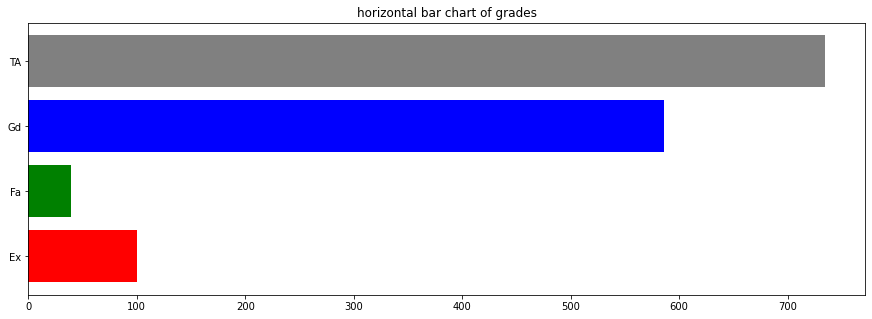

In [0]:
plt.figure(figsize=(15,5))
plt.barh(house_prices_object.groupby("kitchenqual")["kitchenqual"].count().index, 
        house_prices_object.groupby("kitchenqual")["kitchenqual"].count(), 
        color=["red","green","blue","grey","pink"])
plt.title("horizontal bar chart of grades")

plt.show()

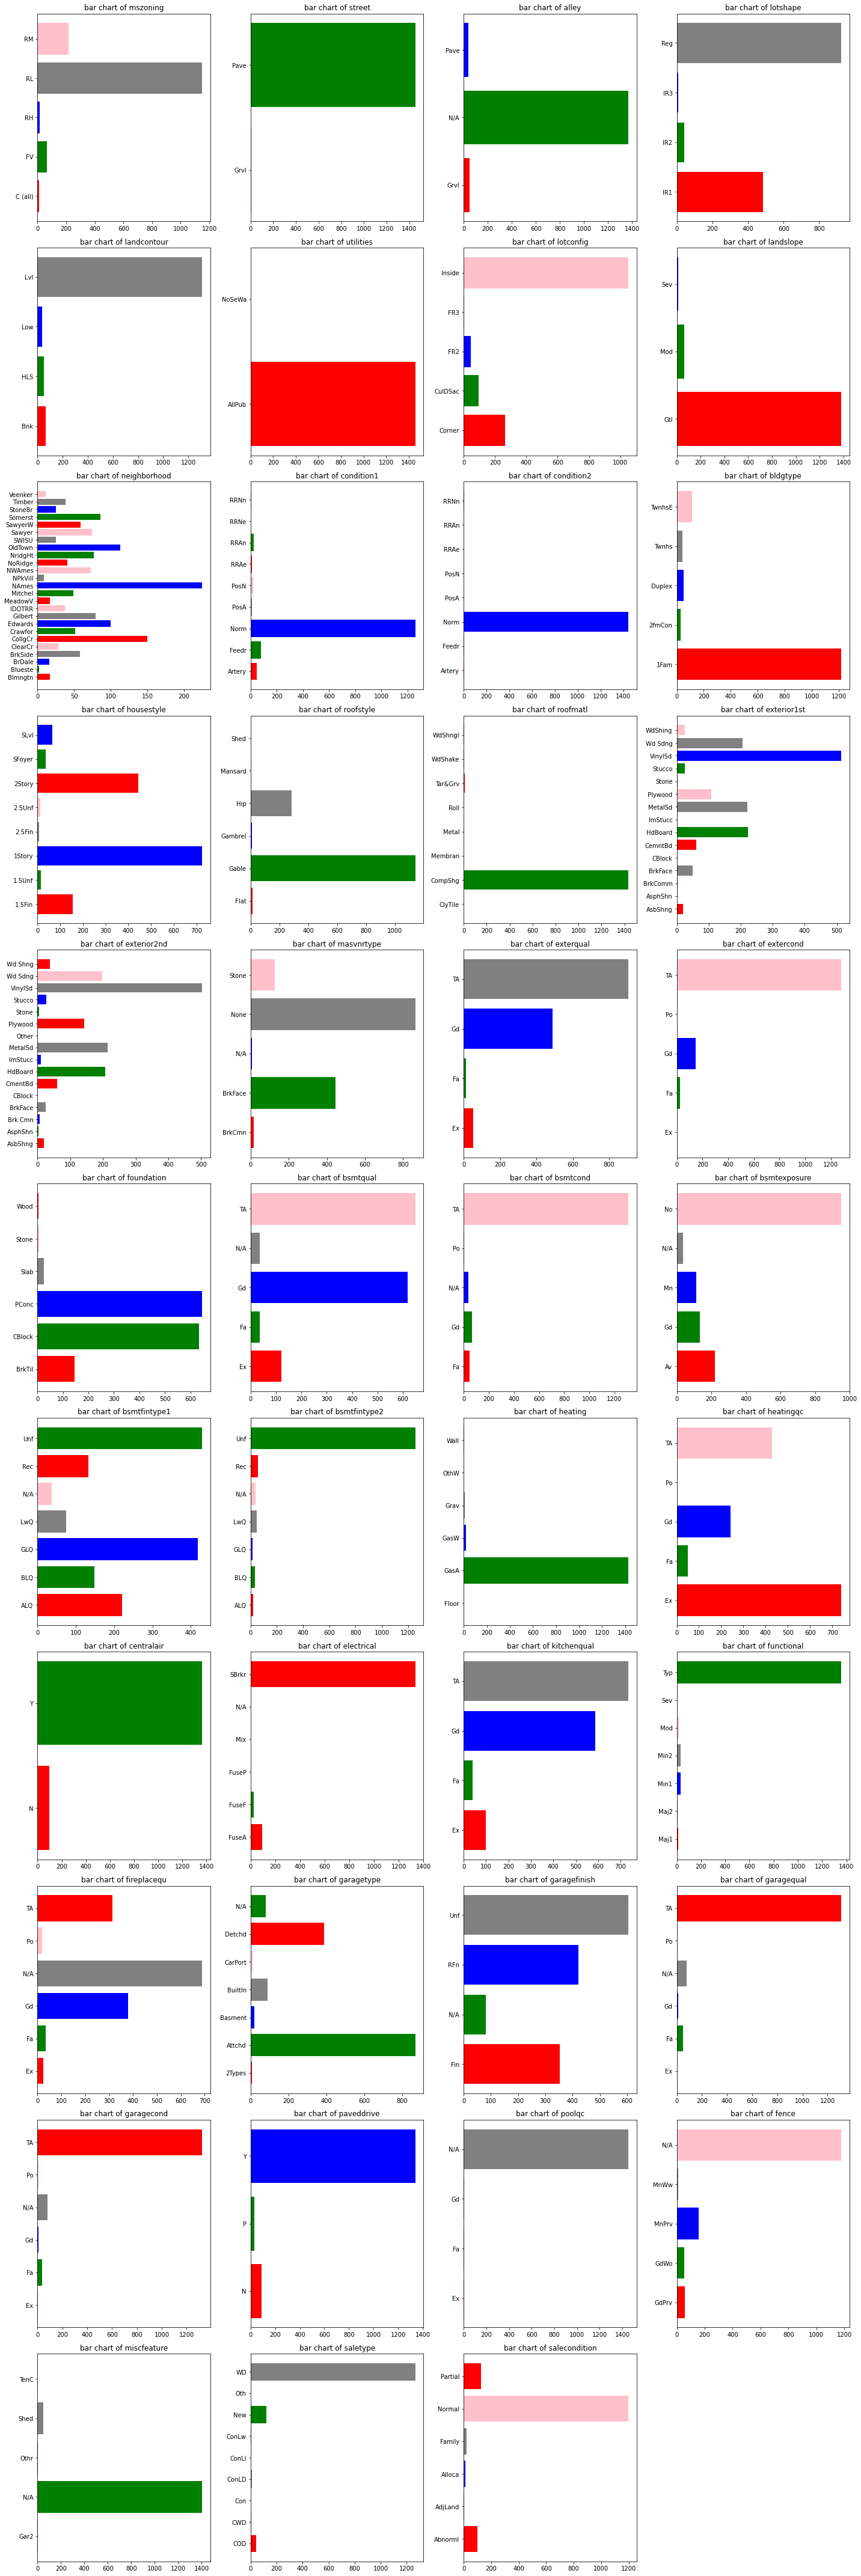

In [0]:
fig = plt.figure(figsize=(20,200))

for i, col in enumerate(column_list_categorical):
  plt.subplot(len(column_list), 4, i+1)
  plt.barh(house_prices_object.groupby(col)[col].count().index, 
          house_prices_object.groupby(col)[col].count(), 
          color=["red","green","blue","grey","pink"])
  plt.title('bar chart of {}'.format(col))

plt.tight_layout()
plt.show()

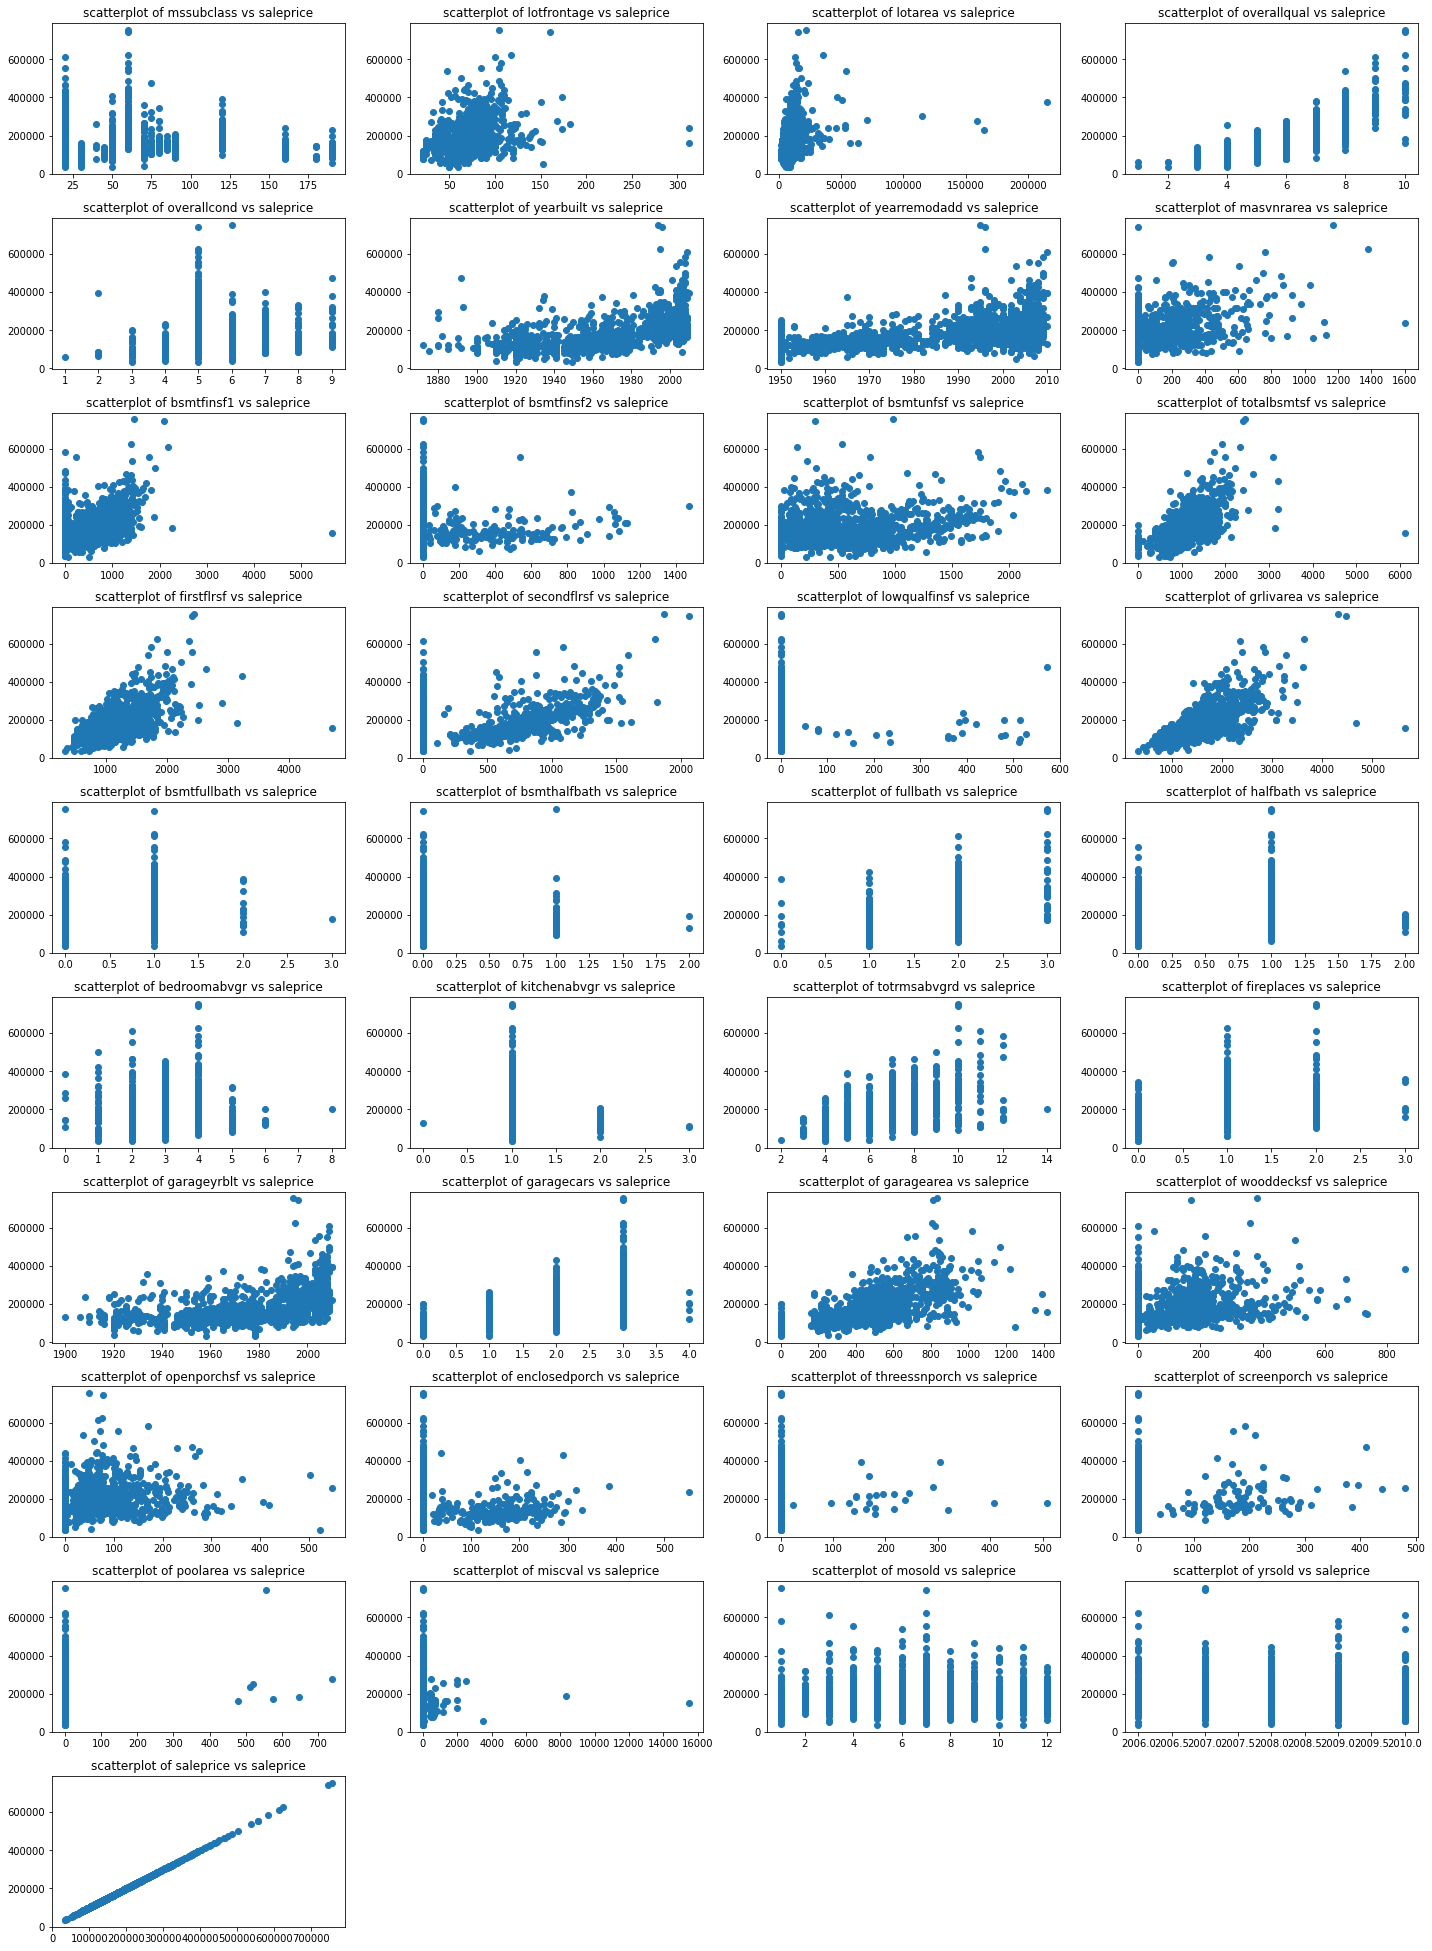

In [0]:
fig = plt.figure(figsize=(20,100))

for i, col in enumerate(column_list):
  plt.subplot(len(column_list), 4, i+1)
  plt.scatter(house_prices_number[col], house_prices_number['saleprice'])
  plt.title('scatterplot of {} vs saleprice'.format(col))

plt.tight_layout()
plt.show()

In [0]:
house_prices_number.corr()

,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
mssubclass,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.080187,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
lotfrontage,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,0.043340,0.122156,0.363358,0.414266,0.072483,0.036849,0.368392,0.091481,-0.006419,0.180424,0.048258,0.237023,-0.005805,0.320146,0.235755,0.064324,0.269729,0.323663,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
lotarea,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024812,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
overallqual,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.518018,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
overallcond,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.306169,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
yearbuilt,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.780555,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
yearremodadd,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.179186,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.618130,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
masvnrarea,0.022895,0.179283,0.103960,0.410238,-0.127788,0.314745,0.179186,1.000000,0.263582,-0.072302,0.114184,0.362452,0.342160,0.174019,-0.069068,0.389893,0.085055,0.026669,0.275730,0.200802,0.102417,-0.037364,0.280027,0.247906,0.249367,0.363778,0.372567,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,-0.008184,0.475241
bsmtfinsf1,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263582,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.150338,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
bsmtfinsf2,-0.065649,0.043340,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072302,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.087126,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


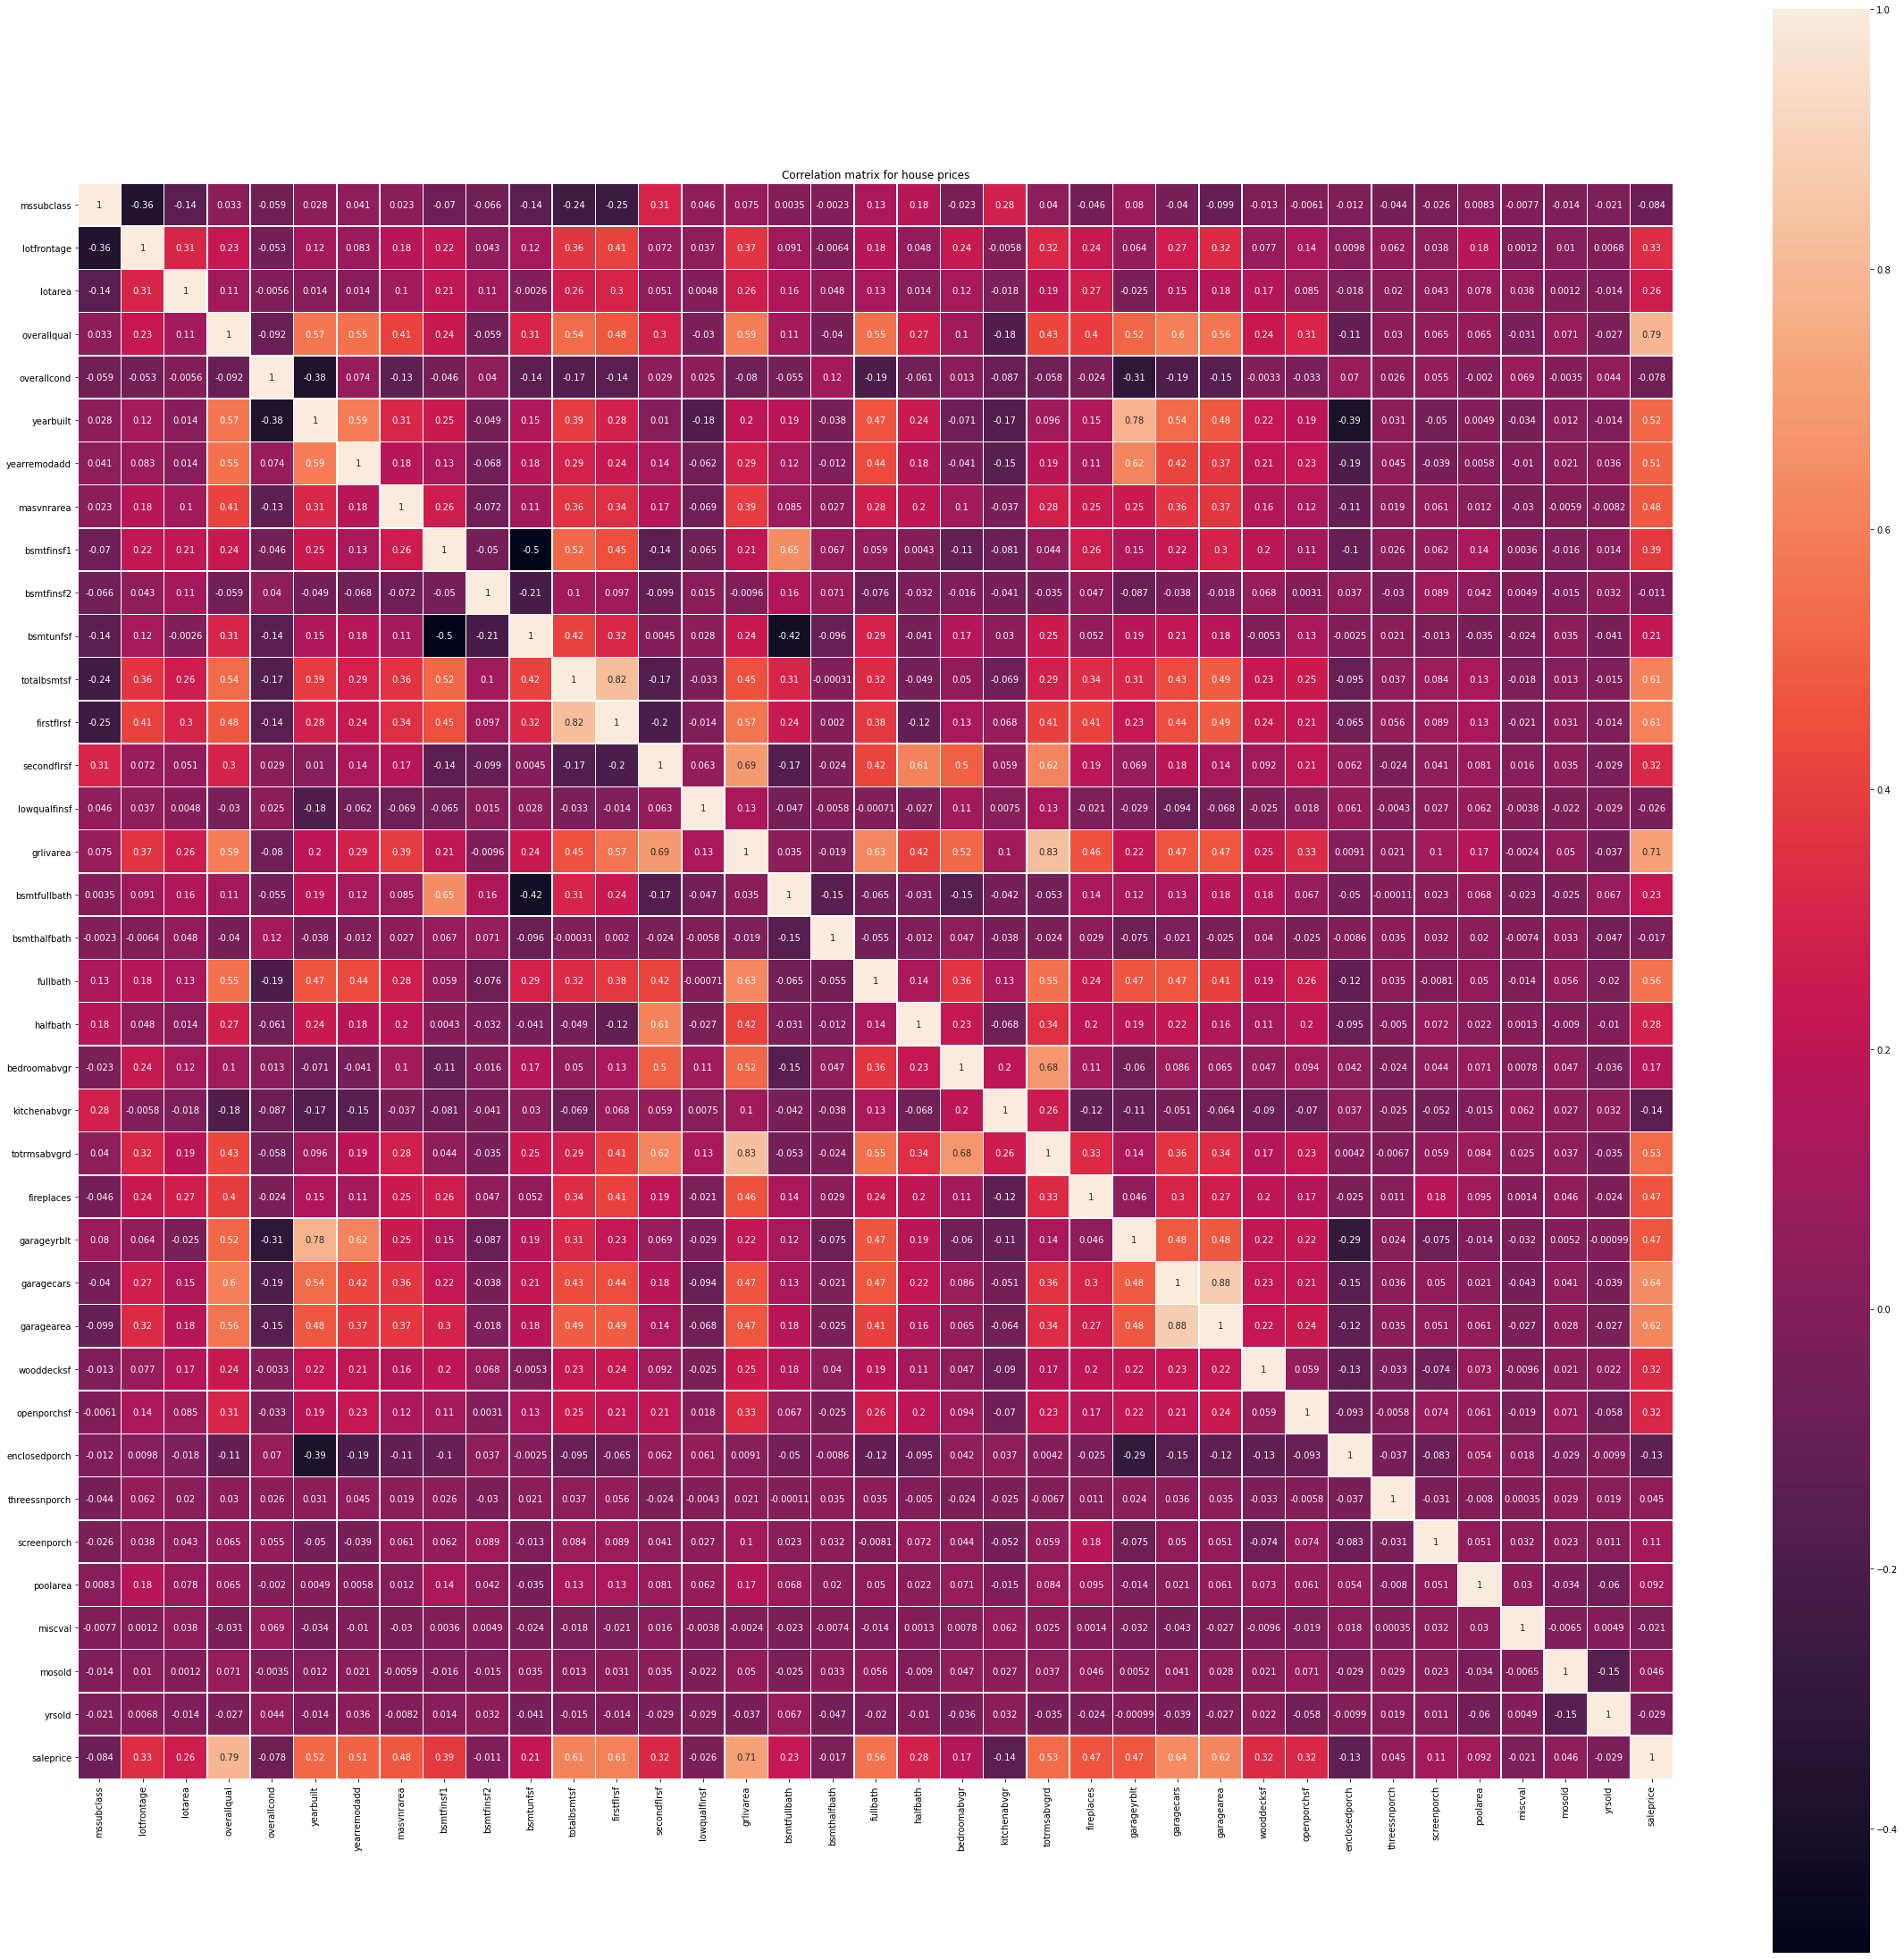

In [0]:
import seaborn as sns
coormat = house_prices_number.corr()

plt.figure(figsize=(40,40))
plt.title('Correlation matrix for house prices')

sns.heatmap(coormat, square=True, annot=True, linewidth= .5)

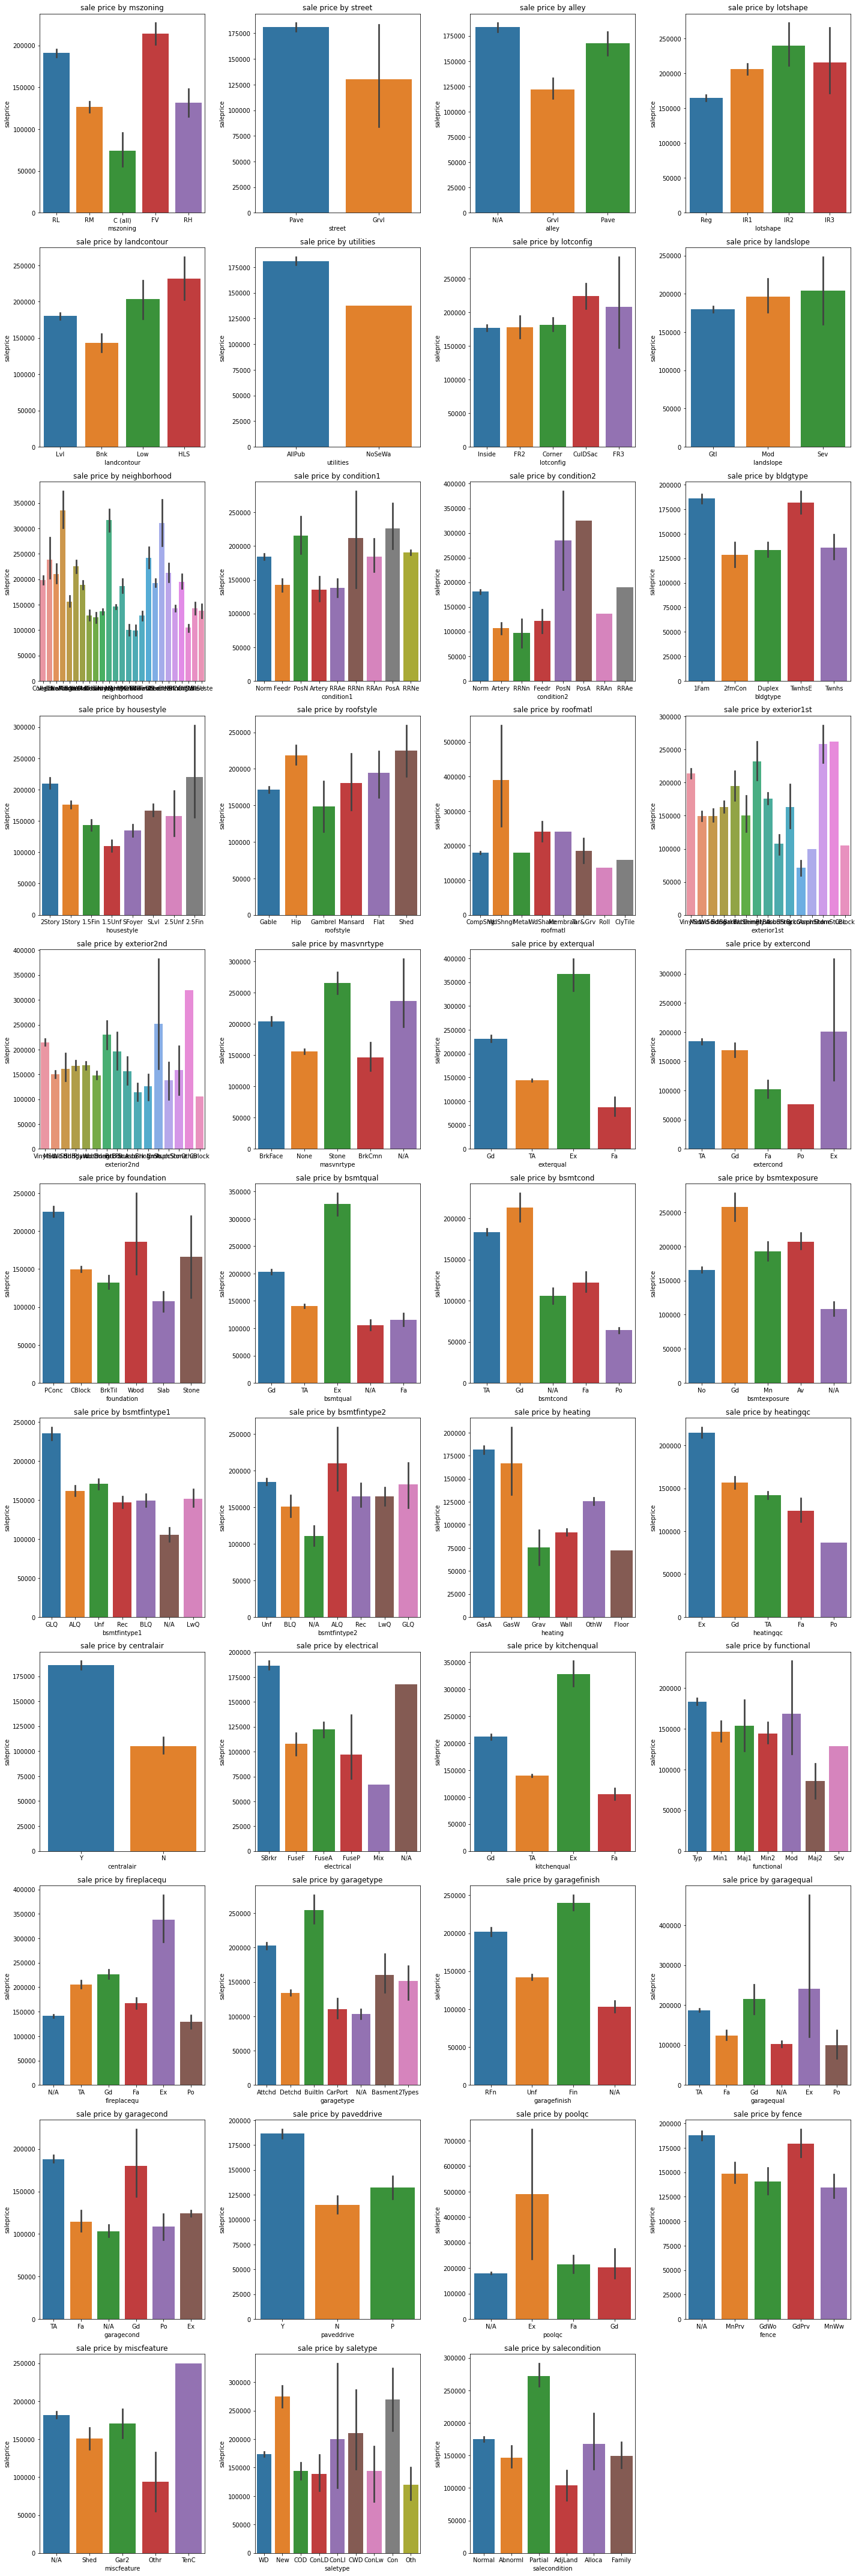

In [0]:
fig = plt.figure(figsize=(20,200))

for i, col in enumerate(column_list_categorical):
  plt.subplot(len(column_list), 4, i+1)
  sns.barplot(house_prices_df3[col], house_prices_df3['saleprice'])
  plt.title('sale price by {}'.format(col))

plt.tight_layout()
plt.show()

### On to feature engineering...
To begin... I am going to create dummies for the categorical values.

In [0]:
dummy_data = pd.get_dummies(house_prices_object, drop_first=True)
dummy_data.head()
#now going to add this to the numeric data
dummied_dataframe = pd.concat([house_prices_number, dummy_data], axis=1)

  


In [0]:
#I am now going to select the appropriate features.
corr_with_dummies = dummied_dataframe.corr()
corr_with_dummies['saleprice'].sort_values().head(10)

exterqual_TA        -0.589044
kitchenqual_TA      -0.519298
fireplacequ_N/A     -0.471908
bsmtqual_TA         -0.452394
garagefinish_Unf    -0.410608
masvnrtype_None     -0.374468
garagetype_Detchd   -0.354141
foundation_CBlock   -0.343263
heatingqc_TA        -0.312677
mszoning_RM         -0.288065
Name: saleprice, dtype: float64

In [0]:
corr_with_dummies['saleprice'].sort_values()

exterqual_TA       -0.589044
kitchenqual_TA     -0.519298
fireplacequ_N/A    -0.471908
bsmtqual_TA        -0.452394
garagefinish_Unf   -0.410608
                      ...   
garagearea          0.623431
garagecars          0.640409
grlivarea           0.708624
overallqual         0.790982
saleprice           1.000000
Name: saleprice, Length: 262, dtype: float64

In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
X = dummied_dataframe.loc[:, dummied_dataframe.columns != 'saleprice']
X = StandardScaler().fit_transform(X)
sklearn_pca = PCA(n_components=1)
dummied_dataframe["pca_1"] = sklearn_pca.fit_transform(X)



In [0]:
corrs = dummied_dataframe.corr()
corrs['saleprice'].sort_values()
#As shown from the below, I am going to be using three features. I am going to be using grlivarea, overallqual, and garagecars. These have the strongest correlation with
#the saleprice and are not likely to be as correlated wth one another as exterqual, kitchenqual

exterqual_TA       -0.589044
kitchenqual_TA     -0.519298
fireplacequ_N/A    -0.471908
bsmtqual_TA        -0.452394
garagefinish_Unf   -0.410608
                      ...   
garagecars          0.640409
grlivarea           0.708624
pca_1               0.779972
overallqual         0.790982
saleprice           1.000000
Name: saleprice, Length: 263, dtype: float64

In [0]:
Y = dummied_dataframe['saleprice']
X = dummied_dataframe[['overallqual', 'grlivarea', 'garagecars']]

lrm = linear_model.LinearRegression()


lrm.fit(X, Y)


print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [27104.82597153    50.67421142 21298.95976754]

Intercept: 
 -98832.49325495967


In [0]:
import statsmodels.api as sm


X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     1375.
Date:                Tue, 28 Apr 2020   Prob (F-statistic):               0.00
Time:                        19:25:22   Log-Likelihood:                -17563.
No. Observations:                1460   AIC:                         3.513e+04
Df Residuals:                    1456   BIC:                         3.516e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.883e+04   4842.897    -20.408      0.000   -1.08e+05   -8.93e+04
overallqual   2.71e+04   1072.182     25.280      0.000     2.5e+04    2.92e+04
grlivarea      50.6742      2.552     19.859      0.000      45.669      55.680
garagecars    2.13e+04   1807.065     11.786      0.000    1.78e+04    2.48e+04
==============================================================================
Omnibus:                      419.972   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9575.801
Skew:                           0.788   Prob(JB):                         0.00
Kurtosis:                      15.447   Cond. No.                     7.40e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As shown above, the F-statistic is 1375 and the p-value is close to zero indicating that the features are in fact contributing some useful information to explaining the target. The r^2 value is 0.739

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("Training set obs: {}".format(X_train.shape[0]))
print("Test set obs{}".format(X_test.shape[0]))

Training set obs: 1168
Test set obs292


In [0]:
X_train = sm.add_constant(X_train)

In [0]:
results = sm.OLS(y_train, X_train).fit()


results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     1109.
Date:                Tue, 28 Apr 2020   Prob (F-statistic):               0.00
Time:                        19:25:22   Log-Likelihood:                -14037.
No. Observations:                1168   AIC:                         2.808e+04
Df Residuals:                    1164   BIC:                         2.810e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.916e+04   5400.868    -18.360      0.000    -1.1e+05   -8.86e+04
overallqual  2.755e+04   1213.021     22.708      0.000    2.52e+04    2.99e+04
grlivarea      48.0541      2.803     17.143      0.000      42.554      53.554
garagecars   2.208e+04   2026.441     10.896      0.000    1.81e+04    2.61e+04
==============================================================================
Omnibus:                      277.503   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7043.475
Skew:                           0.471   Prob(JB):                         0.00
Kurtosis:                      14.993   Cond. No.                     7.49e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
X_test = sm.add_constant(X_test)

Y_pred = results.predict(X_test)

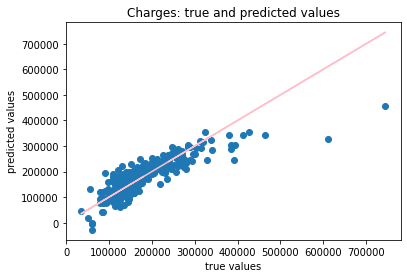

Mean absolute error: 28626.546525639453
Mean squared error: 1802524017.4160357
Root mean squared error: 42456.142281371205
Mean absolute percentage error: 17.741520714162718


In [0]:
plt.scatter(y_test, Y_pred)
plt.plot(y_test, y_test, color = 'pink')
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error: {}".format(mean_absolute_error(y_test, Y_pred)))
print("Mean squared error: {}".format(mse(y_test, Y_pred)))
print("Root mean squared error: {}".format(rmse(y_test, Y_pred)))
print("Mean absolute percentage error: {}".format(np.mean(np.abs((y_test - Y_pred) / y_test)) * 100))
#as shown in the below, the model is generally better with predicting the lower values.


In [0]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
dummied_dataframe['overallqual'].isnull().sum()
alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]


In [0]:
ridge_reg = RidgeCV(alphas= alphas, cv=5)
ridge_reg.fit(X_train, y_train)
y_train_predictions = ridge_reg.predict(X_train)
y_test_predictions = ridge_reg.predict(X_test)

print("Best alpha value is: {}".format(ridge_reg.alpha_))
print("R-squared of the model in training set is: {}".format(ridge_reg.score(X_train, y_train)))

print("R-squared of the model in test set is: {}".format(ridge_reg.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_test_predictions)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_test_predictions)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_test_predictions)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_test_predictions) / y_test)) * 100))
#as shown below, not much has appeared to change...


Best alpha value is: 1e-10
R-squared of the model in training set is: 0.7407518211200288
R-squared of the model in test set is: 0.7315157182702707
Mean absolute error of the prediction is: 28626.546525639154
Mean squared error of the prediction is: 1802524017.41598
Root mean squared error of the prediction is: 42456.14228137055
Mean absolute percentage error of the prediction is: 17.741520714162593


In [0]:
lasso_reg = LassoCV(alphas=alphas, cv=5)

lasso_reg.fit(X_train, y_train)
y_train_predictions =  lasso_reg.predict(X_train)
y_test_predictions = lasso_reg.predict(X_test)

print("Best alpha value is: {}".format(lasso_reg.alpha_))
print("R-squared of the model in training set is: {}".format(lasso_reg.score(X_train, y_train)))

print("R-squared of the model in test set is: {}".format(lasso_reg.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_test_predictions)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_test_predictions)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_test_predictions)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_test_predictions) / y_test)) * 100))
#not much has changed here as well as shown below. 

Best alpha value is: 1e-10
R-squared of the model in training set is: 0.7407518211200286
R-squared of the model in test set is: 0.7315157182702671
Mean absolute error of the prediction is: 28626.54652563972
Mean squared error of the prediction is: 1802524017.4160047
Root mean squared error of the prediction is: 42456.14228137084
Mean absolute percentage error of the prediction is: 17.74152071416303


In [0]:
elasticnet_reg = ElasticNetCV(alphas=alphas, cv=5)

elasticnet_reg.fit(X_train, y_train)
y_train_predictions =  elasticnet_reg.predict(X_train)
y_test_predictions = elasticnet_reg.predict(X_test)

print("Best alpha value is: {}".format(elasticnet_reg.alpha_))
print("R-squared of the model in training set is: {}".format(elasticnet_reg.score(X_train, y_train)))

print("R-squared of the model in test set is: {}".format(elasticnet_reg.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_test_predictions)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_test_predictions)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_test_predictions)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_test_predictions) / y_test)) * 100))
#as shwn below. the stats on the data are slightly more desirable. 


Best alpha value is: 0.001
R-squared of the model in training set is: 0.7407517719041139
R-squared of the model in test set is: 0.7315369860286526
Mean absolute error of the prediction is: 28623.095123291314
Mean squared error of the prediction is: 1802381231.979778
Root mean squared error of the prediction is: 42454.46068412338
Mean absolute percentage error of the prediction is: 17.738800797346634


In [0]:
#I am now going to combine some features. First. I am going to look at the annual average yields and incorporate them into the analyses. 
house_prices_df3['yrsold'].unique()
int_rates = {2006: 0.0497, 2007: 0.0502, 2008: 0.0192, 2009: 0.0016, 2010:0.0018}
dummied_dataframe['int_rate'] = dummied_dataframe.yrsold.map(int_rates)

    

In [0]:
#I am also going to create a new value... price per area of lot. This can tell is if the price is dependent on the area or another factor like the location.
dummied_dataframe['priceperlot'] = dummied_dataframe.saleprice / dummied_dataframe.lotarea

In [0]:
Y = dummied_dataframe['saleprice']
X = dummied_dataframe[['overallqual', 'grlivarea', 'garagecars', 'priceperlot', 'int_rate']]

lrm = linear_model.LinearRegression()


lrm.fit(X, Y)


print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [26549.88757278    51.19421191 21298.33902446   128.84179621
  5740.1130118 ]

Intercept: 
 -99101.9763355352


In [0]:
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     825.1
Date:                Tue, 28 Apr 2020   Prob (F-statistic):               0.00
Time:                        19:25:23   Log-Likelihood:                -17562.
No. Observations:                1460   AIC:                         3.514e+04
Df Residuals:                    1454   BIC:                         3.517e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -9.91e+04   4987.715    -19.869      0.000   -1.09e+05   -8.93e+04
overallqual  2.655e+04   1146.186     23.164      0.000    2.43e+04    2.88e+04
grlivarea      51.1942      2.582     19.830      0.000      46.130      56.258
garagecars    2.13e+04   1807.625     11.783      0.000    1.78e+04    2.48e+04
priceperlot   128.8418     93.820      1.373      0.170     -55.195     312.879
int_rate     5740.1130   4.91e+04      0.117      0.907   -9.06e+04    1.02e+05
==============================================================================
Omnibus:                      415.114   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9138.528
Skew:                           0.783   Prob(JB):                         0.00
Kurtosis:                      15.156   Cond. No.                     7.41e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("Training set obs: {}".format(X_train.shape[0]))
print("Test set obs{}".format(X_test.shape[0]))

Training set obs: 1168
Test set obs292


In [0]:
X_train = sm.add_constant(X_train)

In [0]:
results = sm.OLS(y_train, X_train).fit()


results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     664.5
Date:                Tue, 28 Apr 2020   Prob (F-statistic):               0.00
Time:                        19:25:23   Log-Likelihood:                -14037.
No. Observations:                1168   AIC:                         2.809e+04
Df Residuals:                    1162   BIC:                         2.812e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.881e+04   5546.082    -17.815      0.000    -1.1e+05   -8.79e+04
overallqual  2.724e+04   1292.073     21.085      0.000    2.47e+04    2.98e+04
grlivarea      48.4272      2.849     16.996      0.000      42.837      54.018
garagecars   2.209e+04   2028.306     10.893      0.000    1.81e+04    2.61e+04
priceperlot    69.7595    103.265      0.676      0.499    -132.847     272.366
int_rate    -2.166e+04   5.45e+04     -0.398      0.691   -1.29e+05    8.52e+04
==============================================================================
Omnibus:                      276.890   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6913.295
Skew:                           0.475   Prob(JB):                         0.00
Kurtosis:                      14.881   Cond. No.                     7.45e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Judging from the above, the new features didn't seem to contribute to increasing the r-squared value, implying that the interest rate and price per area doesn't have much of an effect, based on this data. Because the price per the size of the lot doesn't seem to have an effect, it means the value may be contributed moreso to other features like the location and quality of the house. Interest rates on the other hand may have an affect some years down the line as their affect is often not felt by individuals immediately. Often when interest rates are tweaked, the affects have to ripple through the economy as a whole with first going to banks and firms and then lastly affecting the mortgages individuals could apply for/be willing to undertake. 